In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [29]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat['State'] = le.fit_transform(df_cat["State"])

In [31]:
df_cat

,State
0,2
1,0
2,1
3,2
4,1
5,2
6,0
7,1
8,2
9,0


In [34]:
df = pd.concat([df_cat,df_num],axis=1)
df.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
0,2,165349.20,136897.80,471784.10,192261.83
1,0,162597.70,151377.59,443898.53,191792.06
2,1,153441.51,101145.55,407934.54,191050.39
3,2,144372.41,118671.85,383199.62,182901.99
4,1,142107.34,91391.77,366168.42,166187.94


In [35]:
x = df.iloc[:,0:-1]
y= df.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred = linreg.predict(xtest)

In [40]:
from sklearn.metrics import r2_score, mean_squared_error as mse

print(f'Error rate rmse = {mse(ytest, ypred)**0.5}')
print(f'Error rate mse = {mse(ytest, ypred)}')
print(f'Accuracy = {r2_score(ytest, ypred)}')

Error rate rmse = 8913.354557987766
Error rate mse = 79447889.47640128
Accuracy = 0.9649827631091704


In [41]:
linreg.coef_

array([ 1.73159640e+02,  7.73632191e-01, -9.41863371e-03,  2.93451013e-02])

In [42]:
linreg.intercept_

49637.34362243095

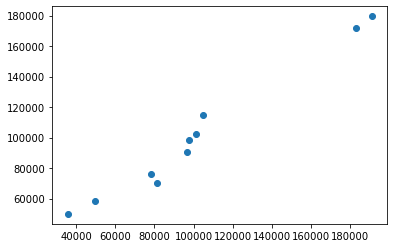

In [43]:
plt.scatter(ytest,ypred)